### Correlation:
Correlation is the degree to which two variables are linearly related. Correlation doesn't imply always causations. Following are the two important correlations : -

   - **Pearsonr**: Important Inference to keep in mind: The Pearson correlation can evaluate ONLY a linear relationship between two continuous variables (A relationship is linear only when a change in one variable is associated with a proportional change in the other variable)
   
   - **Spearmanr**: In statistics, Spearman’s rank correlation coefficient or Spearman’s ρ, named after Charles Spearman is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a <u>monotonic function</u>.
   
<a href="https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8">More Read...</a>


In [16]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats.stats import pearsonr, spearmanr
import seaborn as sb

In [26]:
cars_df = pd.read_csv('/home/jupyter/codes/_notes/python/data/mtcars.csv')
iris_df = pd.read_csv('/home/jupyter/codes/_notes/python/data/iris.csv')
cars_df.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb']
cars_df = cars_df.set_index('car_names').sort_index()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,
AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1


In [15]:
cars_df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [22]:
iris_df = iris_df.set_index(iris_df.columns[0])

In [28]:
cars_df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,
AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1


In [30]:
corr = cars_df.corr()

<Axes:>

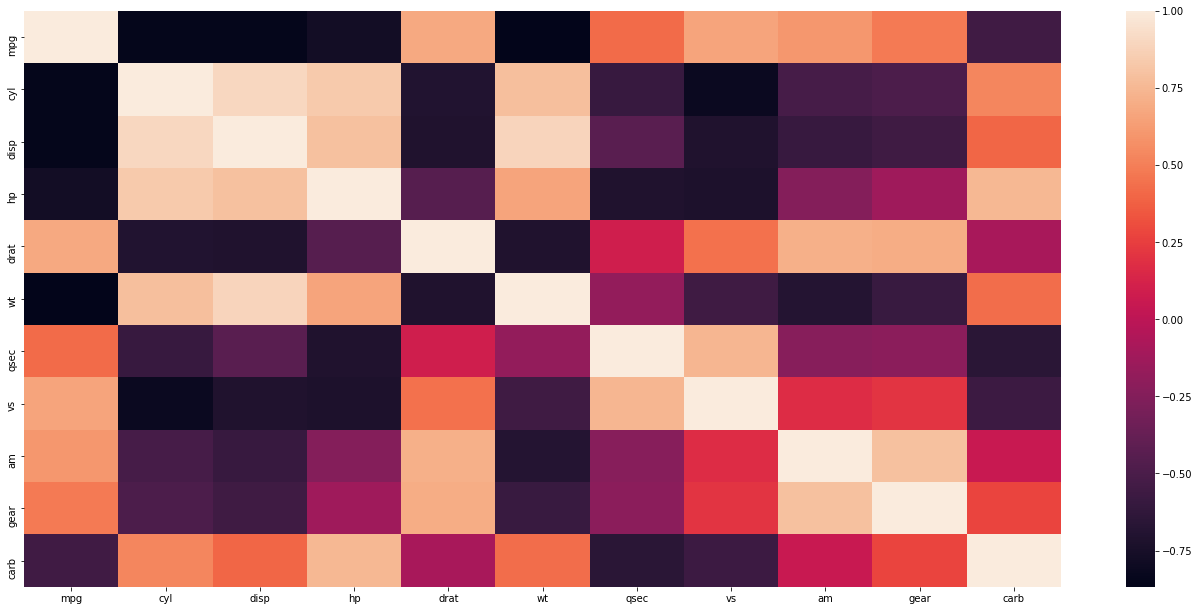

In [36]:
import matplotlib.pyplot as plt
plt.figure().add_axes([.1,.1,3,2])
sb.heatmap(corr)

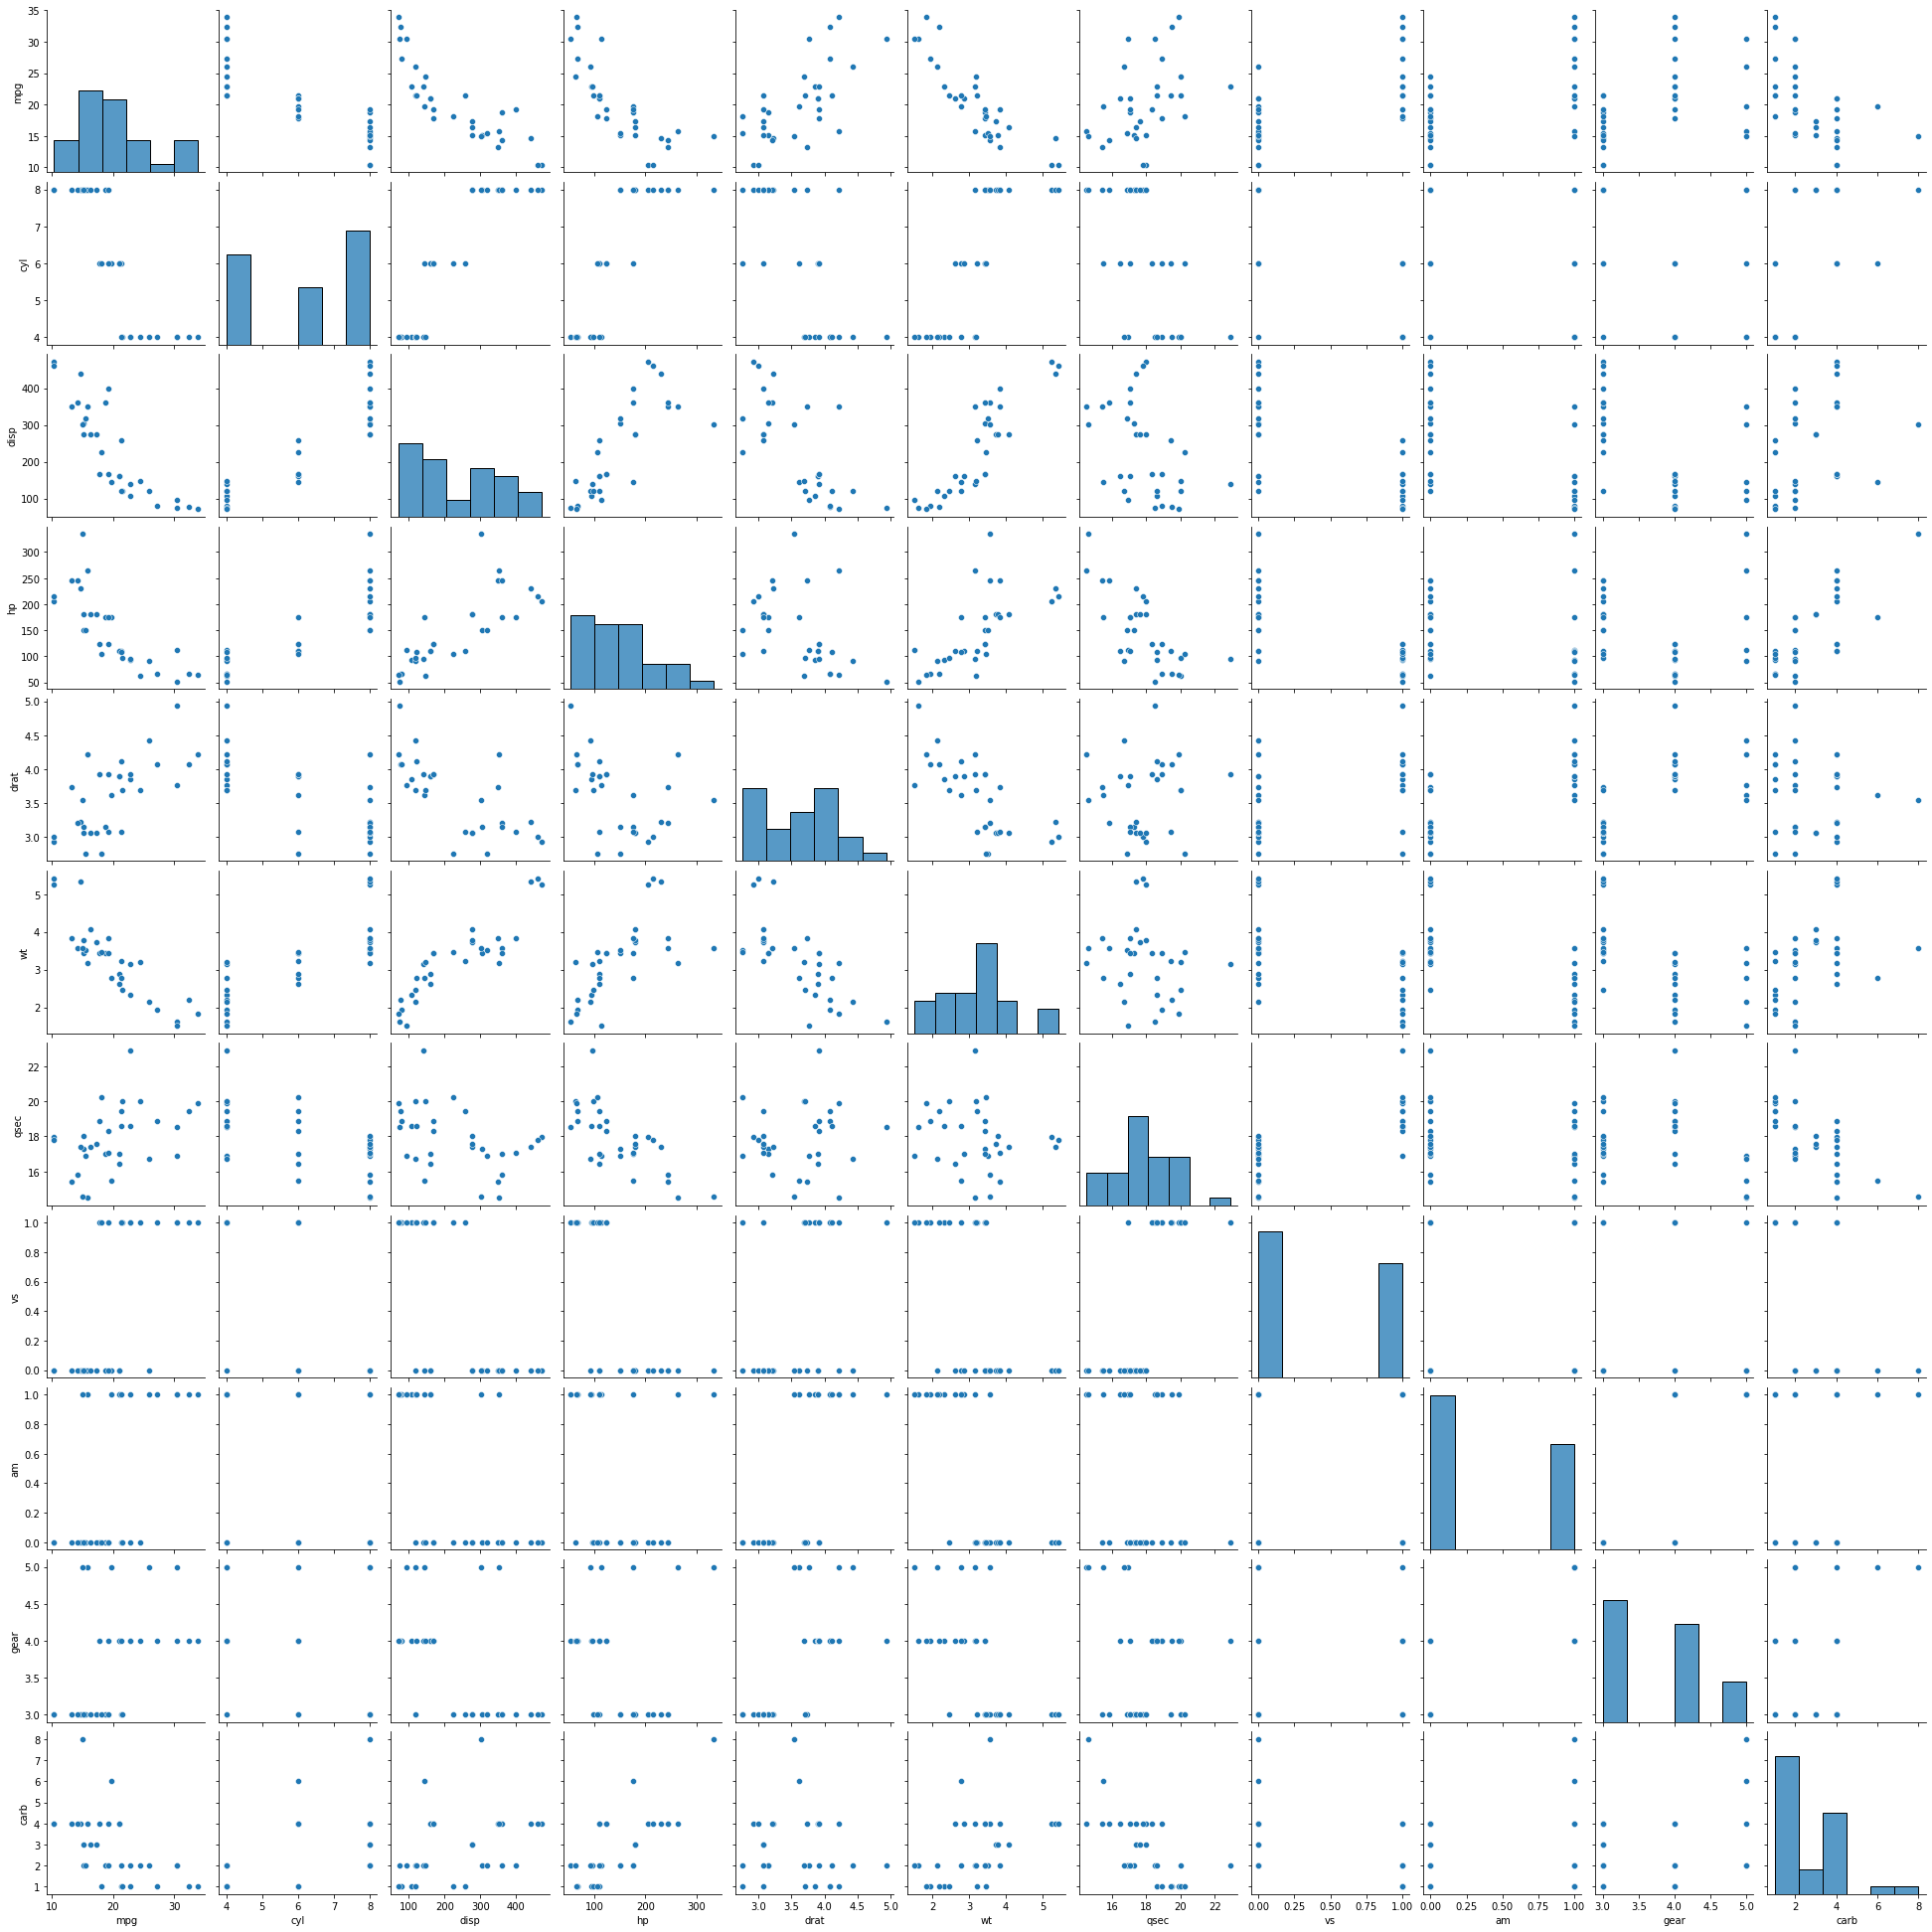

In [37]:
sb.pairplot(cars_df)

In [44]:
cars_df_snap = cars_df[['disp', 'hp', 'drat', 'wt', 'qsec']]

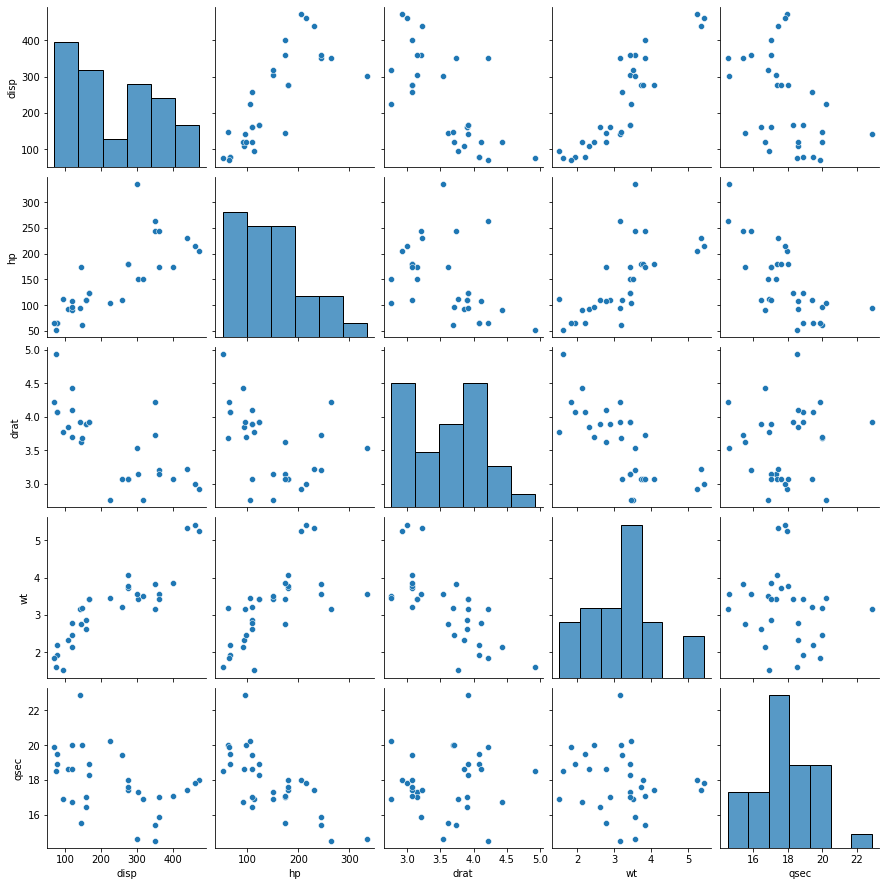

In [45]:
sb.pairplot(cars_df_snap)

In [46]:
cars_df_snap.corr()

,disp,hp,drat,wt,qsec
disp,1.000000,0.790949,-0.710214,0.887980,-0.433698
hp,0.790949,1.000000,-0.448759,0.658748,-0.708223
drat,-0.710214,-0.448759,1.000000,-0.712441,0.091205
wt,0.887980,0.658748,-0.712441,1.000000,-0.174716
qsec,-0.433698,-0.708223,0.091205,-0.174716,1.000000
